# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm
%matplotlib inline

# Load the Dataset

In [2]:
diabetes_dataset = pd.read_csv('diabetes.csv')

# Preview the Dataset

In [3]:
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# View Dataset Dimensions

In [4]:
print(f'The diabetes dataset has {diabetes_dataset.shape} rows and columns respectively')

The diabetes dataset has (768, 9) rows and columns respectively


# View Dataset Summary

In [5]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Descriptive Statistics

In [6]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Check for Missing Data

In [7]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Check for "0" and Inappropriate Values

In [8]:
print((diabetes_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] <= 0).sum())

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [9]:
diabetes_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = diabetes_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NAN)

In [10]:
print(diabetes_dataset.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


# Replace "0" and Inappropriate Values with Mean

In [11]:
diabetes_dataset.fillna(diabetes_dataset.mean(), inplace=True)

# Check for "0" and Inappropriate Values After Replacing with Mean

In [12]:
print(diabetes_dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


# Compare Diabetic and Non-Diabetic Patients

In [14]:
outcome = diabetes_dataset['Outcome'].value_counts()
print(f'Diabetic Patients = {outcome[1]}')
print(f'Non-Diabetic Patients = {outcome[0]}')

Diabetic Patients = 268
Non-Diabetic Patients = 500


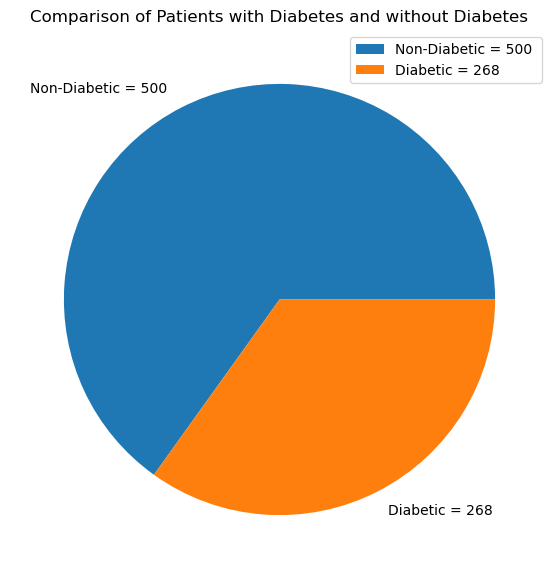

In [15]:
count = np.array(diabetes_dataset['Outcome'].value_counts(sort=True))

labels = ['Non-Diabetic = 500 ', 'Diabetic = 268']

plt.figure(figsize=(9,7))
plt.pie(count, labels=labels)
plt.legend()
plt.title('Comparison of Patients with Diabetes and without Diabetes')
plt.show()

# Encode the Data

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
labelencoder = LabelEncoder()
dataTransformation = diabetes_dataset.copy()

In [18]:
for data in diabetes_dataset.columns:
    dataTransformation[data] = labelencoder.fit_transform(diabetes_dataset[data])

In [19]:
dataTransformation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,86,21,28,94,123,350,29,1
1,1,22,18,21,94,61,196,10,0
2,8,121,16,22,94,29,368,11,1
3,1,26,18,15,61,76,53,0,0
4,0,75,3,28,102,209,514,12,1
...,...,...,...,...,...,...,...,...,...
763,10,38,25,41,108,118,55,42,0
764,2,60,20,19,94,155,187,6,0
765,5,58,21,15,70,57,115,9,0
766,1,64,13,22,94,94,195,26,1


# Labeling

In [20]:
X = dataTransformation.drop(['Outcome'], axis=1)

In [21]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,86,21,28,94,123,350,29
1,1,22,18,21,94,61,196,10
2,8,121,16,22,94,29,368,11
3,1,26,18,15,61,76,53,0
4,0,75,3,28,102,209,514,12
...,...,...,...,...,...,...,...,...
763,10,38,25,41,108,118,55,42
764,2,60,20,19,94,155,187,6
765,5,58,21,15,70,57,115,9
766,1,64,13,22,94,94,195,26


In [22]:
Y = dataTransformation['Outcome']

In [23]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [24]:
diabetes_risk_factors = list(X.columns)

In [25]:
diabetes_risk_factors

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# Split Data as Train Set and Test Set

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 40)

In [28]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
402,5,74,29,34,56,137,149,14
748,3,124,20,14,120,151,233,15
606,1,119,26,35,151,187,493,1
253,0,23,19,25,94,145,109,4
361,5,96,20,22,94,91,85,42
...,...,...,...,...,...,...,...,...
440,0,126,41,17,94,130,252,20
165,6,41,23,10,95,92,393,20
7,10,52,22,22,94,140,23,8
219,5,49,18,22,94,165,130,20


In [29]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
370,3,111,28,41,171,171,513,4
388,5,82,28,18,149,108,260,37
611,3,112,12,14,118,118,334,15
550,1,53,20,20,94,69,82,0
232,1,16,27,17,10,50,329,1
...,...,...,...,...,...,...,...,...
747,1,18,23,34,28,230,475,11
520,2,7,20,25,36,46,68,4
335,0,103,25,36,137,234,128,5
312,2,93,23,9,63,61,250,6


In [30]:
Y_train

402    1
748    1
606    1
253    0
361    0
      ..
440    1
165    1
7      0
219    1
326    1
Name: Outcome, Length: 537, dtype: int64

In [31]:
Y_test

370    1
388    1
611    1
550    0
232    0
      ..
747    0
520    0
335    0
312    1
1      0
Name: Outcome, Length: 231, dtype: int64

# Get Shape of the Train Test Split (Rows & Columns)

In [32]:
X_train.shape

(537, 8)

In [33]:
X_test.shape

(231, 8)

In [34]:
Y_train.shape

(537,)

In [35]:
Y_test.shape

(231,)

# Add Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
randomforestclassifier = RandomForestClassifier(n_estimators=1000)
randomforestclassifier.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000)

# Get Predictions

In [38]:
Y_prediction = randomforestclassifier.predict(X_test)

In [39]:
Y_prediction

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

# Get the Accuracy

In [40]:
accuracy = sm.accuracy_score(Y_test, Y_prediction)

In [41]:
print('The accuracy is: ' , str(accuracy))

The accuracy is:  0.7835497835497836


# Classification Report

In [42]:
from sklearn import metrics

In [43]:
print("CLASSIFICATION REPORT: " , metrics.classification_report(Y_prediction,Y_test,target_names=["Has Diabetes","No Diabetes"]))

CLASSIFICATION REPORT:                precision    recall  f1-score   support

Has Diabetes       0.88      0.79      0.83       158
 No Diabetes       0.63      0.77      0.69        73

    accuracy                           0.78       231
   macro avg       0.75      0.78      0.76       231
weighted avg       0.80      0.78      0.79       231



# Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [45]:
sb.set()
get_ipython().run_line_magic('matplotlib','inline')

In [46]:
import matplotlib.pyplot as pt

In [47]:
confusionmetrics = confusion_matrix(Y_test,Y_prediction)

Text(110.44999999999997, 0.5, 'Predicted')

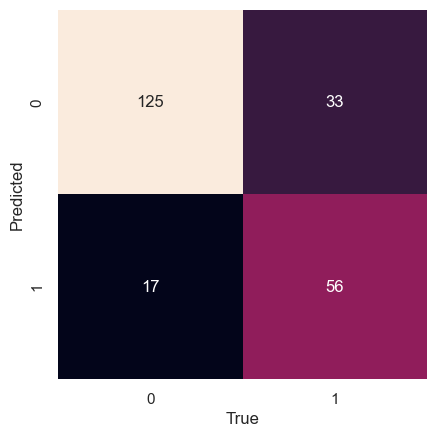

In [48]:
sb.heatmap(confusionmetrics.T, square=True, annot=True, fmt='d', cbar=False)
pt.xlabel('True')
pt.ylabel('Predicted')

# Find the Important Risk Factors

In [49]:
risk_factors_scores = pd.Series(randomforestclassifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)

risk_factors_scores

Glucose                     0.234564
BMI                         0.158818
DiabetesPedigreeFunction    0.131255
Age                         0.131169
Pregnancies                 0.094361
BloodPressure               0.089971
Insulin                     0.080964
SkinThickness               0.078898
dtype: float64

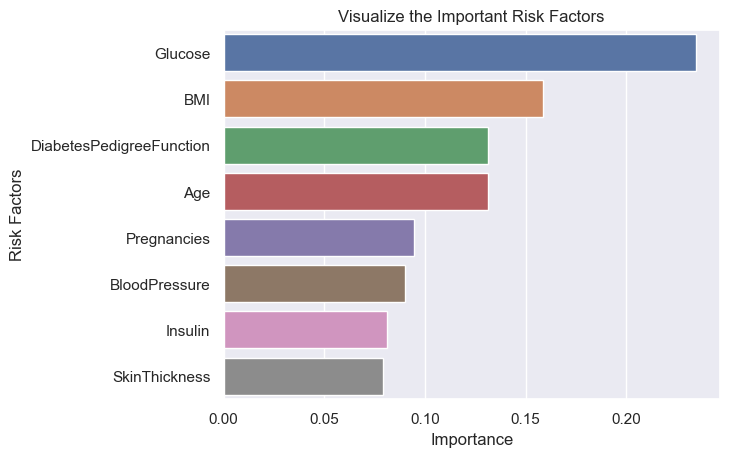

In [50]:
sb.barplot(x=risk_factors_scores, y=risk_factors_scores.index)
plt.title("Visualize the Important Risk Factors")
plt.xlabel('Importance')
plt.ylabel('Risk Factors')
plt.show()